# Notebook for debugging

***

In [1]:
%run -i imports.py
%matplotlib inline

Python==3.10.13

numpy==1.26.3
pandas==2.2.0


***

In [2]:
particles = pypiv.Particle(4, 
                           size=(512,512), 
                           densities=(0.05,0.1),
                           diameters=(10,10),
                           distances=(1,1),
                           seeding_mode='random', 
                           random_seed=101)

In [3]:
particles.seed_particles()

In [4]:
image = pypiv.Image(particles)

Note: Particles have not been added to the image yet!




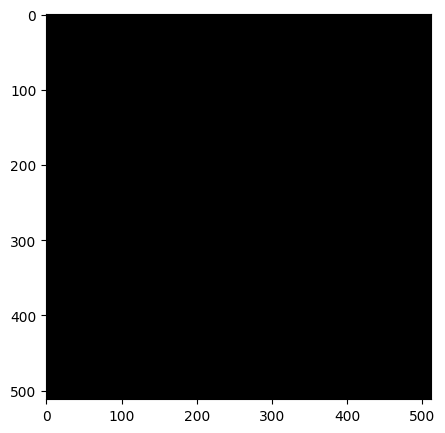

In [5]:
image.plot(0);

In [19]:
image.add_particles()

Particles added to the image.


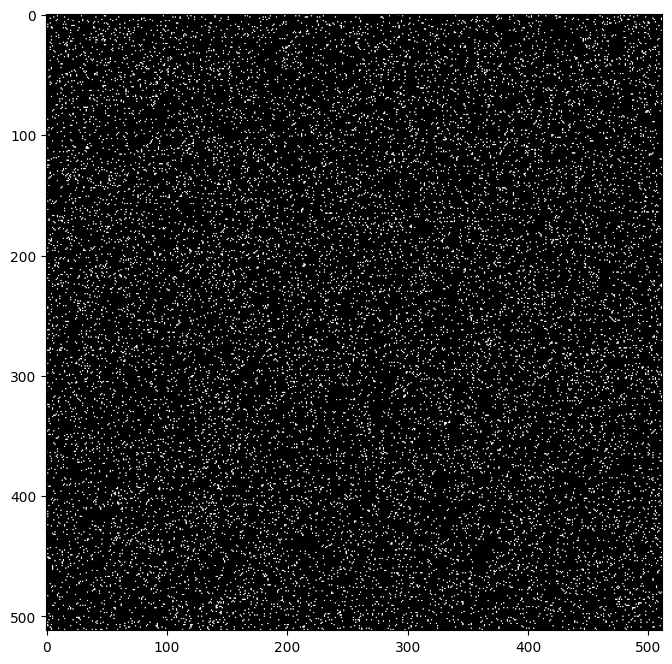

In [18]:
image.plot(0, 
           cmap='Greys_r',
           figsize=(8,8));

In [9]:
particles.density_per_image

array([0.05909462, 0.08928009, 0.09827416, 0.06161768])

In [10]:
particles.n_of_particles

[15491, 23404, 25761, 16152]

***